# **Deep Generative Models: Variational Autoencoders and Generative Adversarial Networks**

# **CK Dataset**
In the following exercices, you will work with images extracted from the CK dataset: http://www.jeffcohn.net/wp-content/uploads/2020/02/Cohn-Kanade_Database.pdf.pdf

It contains gray-scale images of human faces.

The dataset is provided in the folder `Data/faces/` in `.mat` format. In the following we provide a Dataset class in pytorch to load images from this database.

In [6]:
## Create a Custom Dataset for CK database
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io as sio
import MyTorchWrapper as mtw

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# %cd "/content/drive/DeepLearning/P4/"

# All the data will be loaded from the provided file in Data/mnist.t
data_path = 'Data/'
results_path = 'Results/'
save_figure = True # Whether to save figures or not

Create a data loader for the face images dataset

In [7]:
class FacesDB(torch.utils.data.Dataset):
    # Initialization method for the dataset
    def __init__(self,dataDir = data_path+'/faces/face_ims_64x64.mat', transform = None):
        mat_loaded = sio.loadmat(dataDir)
        self.data = mat_loaded['X']
        self.transform = transform

    # What to do to load a single item in the dataset ( read image and label)    
    def __getitem__(self, index):
        data = self.data[:,:,0,index]   
        data = Image.fromarray(data,mode='L')
        # Apply a trasnformaiton to the image if it is indicated in the initalizer
        if self.transform is not None : 
            data = self.transform(data)
        
        # return the image and the label
        return data

    # Return the number of images
    def __len__(self):
        return self.data.shape[3]

Create a `DataLoader` and visualize one image of the dataset

Size of 1 batch of images: torch.Size([256, 1, 64, 64])


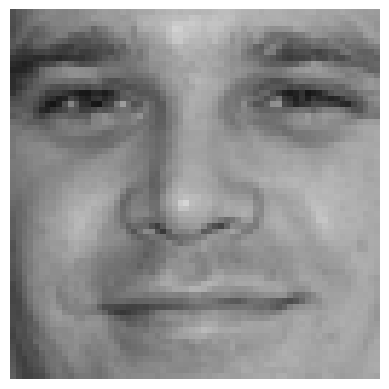

In [8]:
tr = transforms.Compose([transforms.ToTensor(), ])
faces_db = FacesDB(data_path + 'faces/face_ims_64x64.mat', tr)
train_loader = torch.utils.data.DataLoader(dataset=faces_db, batch_size=256, shuffle=True, pin_memory=True)

# Mini-batch images
images = next(iter(train_loader))
print("Size of 1 batch of images:", images.shape)
image = images[0,:,:,:].repeat(3,1,1)
plt.imshow(image.permute(1,2,0).squeeze().numpy())
plt.axis('off')
plt.show()

# Our global variables

In [ ]:
device = mtw.get_torch_device(use_gpu=True, debug=True)
torch.manual_seed(10)

# Create an IO manager instance to save and load model checkpoints
iomanager = mtw.IOManager(storage_dir=results_path + 'notebook_models/')

# Ex. 1

1. Following the example of the MNIST, train a VAE with the images we have provided for the CK dataset.

2. For every two epochs during training:

    2.1. Visualize a set of reconstructed images and compute the reconstruction error over the whole dataset

    2.2. Generate and show a set of images from random noise z. 
    
    2.3. Visualize a set of generated images by interpolating over the latent space z.
    
    2.4 Discuss the different visualizations by analysing their relation with the evolution of the reconstruction loss and the KL regularization term.

## Sol. 1

In [9]:
# TODO: 

# Ex. 2

1. Following the example of the MNIST , train a GAN with the images we have provided for the CK dataset.

2. For every two epochs during training:

    2.1. Generate and show a set of images from random noise z. 

    2.2. Visualize a set of generated images by interpolating over the latent space z.

    2.3 Discuss the different visualizations by analysing their relation between their quality and the evolution of the discriminator and generator losses.

**Compare the results with the ones obtained with VAEs**.

## Sol. 2

In [10]:
# TODO: